In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [89]:
data = {"Mesh size" : [0, 0.1, 0.2, 0.4, 0.8, 1.6],
       "Mass retained" : [6.5, 15.9, 54.9, 56.1, 21.5, 0.4]}
df = pd.DataFrame(data)
df


,Mesh size,Mass retained
0,0.0,6.5
1,0.1,15.9
2,0.2,54.9
3,0.4,56.1
4,0.8,21.5
5,1.6,0.4


In [90]:
# Step 1: Define the function for mass fractions
def mass_fraction(mass):
    '''This function requires the column of mass retained from the data frame to be parsed in.
    It will then compute the mass fractions.
    '''
    mass_frac = (mass / mass.sum()).round(3)
    return mass_frac

In [91]:
# Step 2: Define the function for the width i.e size of intervals
def class_width(mesh):
    ''' The column of mesh sizes from the data can be parsed into this function as the arguement.
    The function then uses the mesh sizes to compute the width.
    '''
    widths = mesh.diff()
    return widths

In [92]:
# Step 1: Define the function to calculate Dmean
def mean_size(mesh):
    ''' This function requires the mesh sizes to be parsed in and then 
    it calculates the mean between intervals of each sizes. 
    '''
    Dmean = mesh.rolling(2).mean().shift(-1)
    return Dmean

In [93]:
# Step 3: Compute the mass fractions and the class widths by calling the respective functions
df['Mass fraction'] = mass_fraction(df['Mass retained'])          
df['Class width'] = class_width(df['Mesh size']).shift(-1)    

#Step 4: Compute the quantity distribution function for the histogram
df['qr'] = df['Mass fraction'] / df['Class width']          
df

,Mesh size,Mass retained,Mass fraction,Class width,qr
0,0.0,6.5,0.042,0.1,0.4200
1,0.1,15.9,0.102,0.1,1.0200
2,0.2,54.9,0.354,0.2,1.7700
3,0.4,56.1,0.361,0.4,0.9025
4,0.8,21.5,0.138,0.8,0.1725
5,1.6,0.4,0.003,NaN,NaN


In [94]:
# Step 2: Compute the mass fractions, class sizes and the means.         
df['Class width'] = class_width(df['Mesh size']).shift(-1)   
df['Dmean'] = mean_size(df['Mesh size'])                     
df['qr_prob'] = df['Mass fraction'] / df['Class width']         
df

,Mesh size,Mass retained,Mass fraction,Class width,qr,Dmean,qr_prob
0,0.0,6.5,0.042,0.1,0.4200,0.05,0.4200
1,0.1,15.9,0.102,0.1,1.0200,0.15,1.0200
2,0.2,54.9,0.354,0.2,1.7700,0.30,1.7700
3,0.4,56.1,0.361,0.4,0.9025,0.60,0.9025
4,0.8,21.5,0.138,0.8,0.1725,1.20,0.1725
5,1.6,0.4,0.003,NaN,NaN,NaN,NaN


In [95]:
df = df.dropna()

In [96]:
df

,Mesh size,Mass retained,Mass fraction,Class width,qr,Dmean,qr_prob
0,0.0,6.5,0.042,0.1,0.4200,0.05,0.4200
1,0.1,15.9,0.102,0.1,1.0200,0.15,1.0200
2,0.2,54.9,0.354,0.2,1.7700,0.30,1.7700
3,0.4,56.1,0.361,0.4,0.9025,0.60,0.9025
4,0.8,21.5,0.138,0.8,0.1725,1.20,0.1725


<BarContainer object of 5 artists>

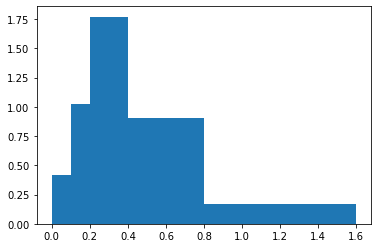

In [97]:
plt.bar(df['Mesh size'], df['qr'], width=df['Class width'], align='edge')

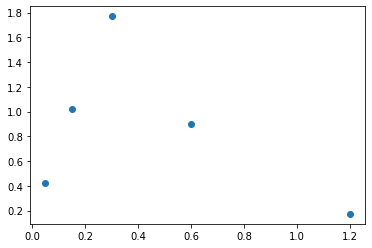

In [98]:
plt.scatter(df['Dmean'], df['qr_prob'])

In [99]:
from scipy.optimize import curve_fit

In [100]:
def lognorm(x, mu, sigma) :
   return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)- 
   mu)**2)/(2*sigma**2))

In [101]:
x_axis = df['Dmean']
y_axis = df['qr_prob']

In [102]:
params = curve_fit(lognorm, x_axis, y_axis)

In [103]:
mu = params[0][0]
sigma = params[0][1]
print(mu, sigma)

-0.826503745445305 0.6637155503018521


In [104]:
logfit = []

for i in x_axis:
    logfit.append(lognorm(i, mu, sigma))

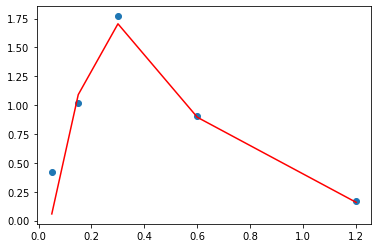

In [105]:
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, logfit, 'r')

In [125]:
from scipy.interpolate import pchip

In [145]:
pch = pchip(x_axis, logfit)

In [150]:
xx = np.linspace(x_axis[0], x_axis[-1:], 500)

<BarContainer object of 5 artists>

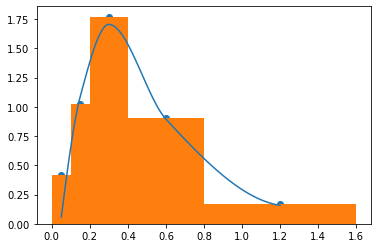

In [152]:
plt.scatter(x_axis, y_axis)
plt.plot(xx, pch(xx))
plt.bar(df['Mesh size'], df['qr'], width=df['Class width'], align='edge')